<a href="https://colab.research.google.com/github/LordWipe67/machine_learning/blob/main/reti_neurali.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# importa i pacchetti di base
import numpy as np # Algebra
import matplotlib.pyplot as plt #grafici
import pandas as pd # manipolazione dei dati
# importa il dataset chiamato MNIST ceh contiene 70.000 immagini di numeri scritti a mano
from keras.datasets import mnist

**Data Processing**

In [3]:
#carica i dati del dataset mninst nelle variabili X_train, y_train e X_test,y_test
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape


(60000, 28, 28)

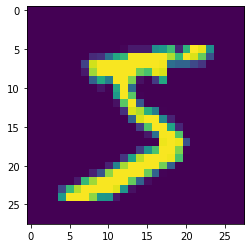

In [57]:
# rappresentazione del primo numero del dataset
plt.imshow(X_train[0,:])
plt.show()


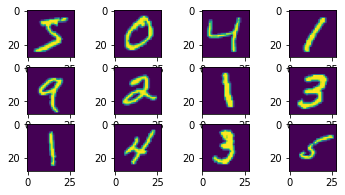

In [ ]:
# rappresentazione dei primi 12 numeri scritti a mano presenti nel dataset MNIST
for i in range(12):
    plt.subplot(4,4,i+1)
    plt.imshow(X_train[i,:])

plt.show()

In [ ]:
# cambia la rappresentazione dell'immagine da matrice 28*28 a vettore di 784
X_train_reshaped = X_train.reshape(60000,28*28)
X_test_reshaped = X_test.reshape(10000,28*28)
np.unique(X_train)

In [10]:
# visualizzo la truttura del vettore di train
X_train_reshaped.shape

(60000, 784)

In [8]:
np.max(X_train_reshaped)

255

In [9]:
np.min(X_train_reshaped)

0

In [11]:
X_train_reshaped[0,:]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [ ]:
# scalo i dati, dividento per il massimo per aumentare la velocità di convergenza
X_train_scaled = X_train_reshaped/255
X_test_scaled = X_test_reshaped/255
np.max(X_train_scaled)

In [ ]:
np.unique(y_train)

In [ ]:
len(np.unique(y_train))

In [17]:
# prendo le prime 5 immagini della matrice di immagini
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [23]:
# trasformiamo i dati presenti in y_train in una matrice
# questo è il modo corretto per trattare un problema di classificazione
# la prima modifica per migliorare il modello è convertire i dati in dammy variables
y_train_dummies = pd.get_dummies(y_train)
y_test_dummies = pd.get_dummies(y_test)
y_train_dummies.shape

(60000, 10)

In [26]:
# calcolo delle probabilità questo fa la softmax sotto inserita
# la funzione softmax da in uscita un solo valore come massima probabilità
# se vogliamo costruire un modello che prevede le previsioni del tempo, dove ci possono essere in uscita più di un risultato
# infatti in una giornata potrebbe essere parzialmente nuvoloso, quindi in uscita potremmo avere due probabilità
# nuvoloso e soleggiato, in quel caso dovremmo utilizzare la funzione 'sigmoid' che prevede in uscita non una sola probabilità ma più di una
vettore = [3,4,2]
np.exp(2)/(np.exp(3)+np.exp(4)+np.exp(2))

0.09003057317038045

In [27]:
# 
y_train_dummies

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [ ]:
y_train_dummies

**Creazione della rete neurale**

In [30]:
# pacchetti essenziali per costruire la rete neurale
from keras.models import Sequential
from keras.layers import Dense, Activation


In [ ]:
!pip install round # ho provato ad installare round ma non è servito a niente

In [31]:
model = Sequential()

# 1° layer
model.add(Dense(1000, input_shape=(784,)))
model.add(Activation('relu'))

# 2° layer
model.add(Dense(1000))
model.add(Activation('relu'))

# 3° layer di uscita
# model.add(Dense(1))
model.add(Dense(10))
model.add(Activation('softmax'))
# model.compile(optimizer='adam', loss='mae', metrics=['mae'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.fit(X_train_scaled, y_train,
#           validation_data=(X_test_scaled,y_test),
#           epochs=10)
model.fit(X_train_scaled, y_train_dummies,
          validation_data=(X_test_scaled,y_test_dummies),
          epochs=30)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2733 - accuracy: 0.9230 - val_loss: 0.1516 - val_accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1201 - accuracy: 0.9651 - val_loss: 0.0992 - val_accuracy: 0.9708
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0834 - accuracy: 0.9750 - val_loss: 0.0877 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0633 - accuracy: 0.9806 - val_loss: 0.0822 - val_accuracy: 0.9736
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0493 - accuracy: 0.9849 - val_loss: 0.0831 - val_accuracy: 0.9734
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0398 - accuracy: 0.9882 - val_loss: 0.0720 - val_accuracy: 0.9770
Epoch 7/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0746 - val_accuracy

In [32]:
# y_pred = np.around(model.predict(X_test_scaled))[:,0]
y_pred = np.argmax(model.predict(X_test_scaled), axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [33]:
y_pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [34]:
# questo rappresenta lo score
np.mean(y_pred == y_test)

0.9771